In [30]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

from pathlib import Path
import sys

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)


from lib.utils import extract_experiment_data # noqa
from lib.utils import table_generation # noqa

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Separed site analysis

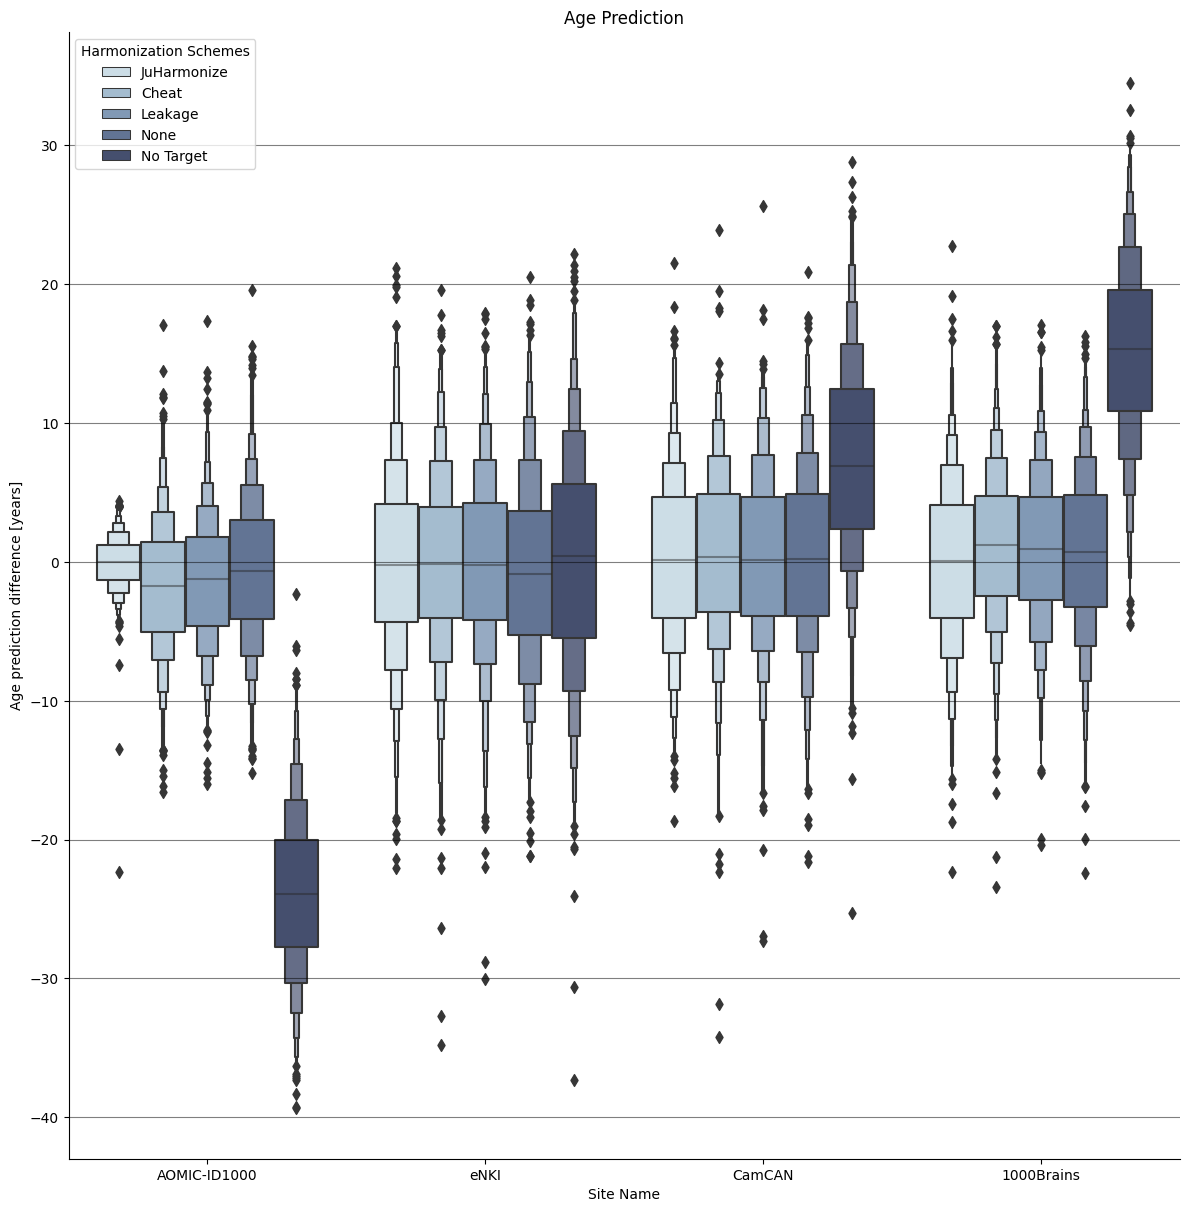

                        Age_bias        R2        MAE
Cheat                  -0.240234  0.915753   4.600000
JuHarmonize            -0.214780  0.926623   4.090806
Leakage                -0.249862  0.916274   4.625743
NeuroHarmony           -0.577847  0.867222   6.020085
No Target              -0.814678  0.331946  14.187270
None                   -0.269594  0.908340   4.892786
predict_pretend        -0.235226  0.919236   4.283451
predict_pretend_nosite -0.293579  0.907692   4.616219
pretend_nosite         -0.304095  0.915869   4.448656


In [3]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_r8"
experiments_to_check = {
    'test_all_regression_r8'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = (data["y_true"]-data["y_pred"])

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.catplot(
    data=data, kind="boxen",
    x="site", y="y_diff", hue="Harmonization Schemes",
    height=12, hue_order=harm_modes, legend_out=False,
    order=["AOMIC-ID1000", "eNKI", "CamCAN", "1000Brains"],
    palette=pal
)
plt.ylabel("Age prediction difference [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Global comparision With stadistical comparision

              Age_bias        R2        MAE
JuHarmonize  -0.214780  0.926623   4.090806
Leakage      -0.249862  0.916274   4.625743
NeuroHarmony -0.577847  0.867222   6.020085
No Target    -0.814678  0.331946  14.187270
None         -0.269594  0.908340   4.892786
p-value annotation legend:
ns: 1.00e-02 < p <= 1.00e+00
* p<0.01: p <= 1.00e-02

Using zero_method  wilcox
JuHarmonize v.s. Leakage: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.474e-15 stat=2.639e+06
Using zero_method  wilcox
JuHarmonize v.s. None: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.133e-26 stat=2.476e+06


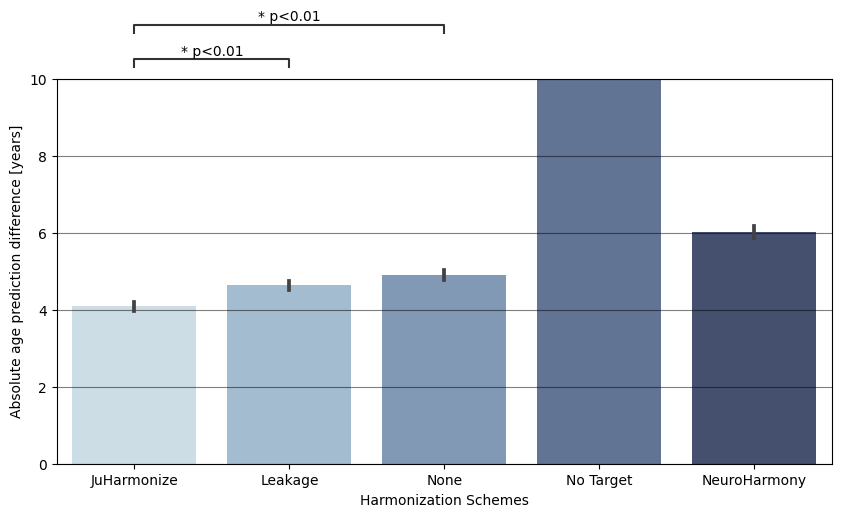

In [5]:
data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
data = data[data["Harmonization Schemes"].isin(harm_modes)]

fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data,
    x="Harmonization Schemes", y="y_diff",
    order=harm_modes, ax=ax,
    palette=pal, seed=23, n_boot=1000
)
plt.ylabel("Absolute age prediction difference [years]")
plt.xlabel("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
table = table_generation(data)
print(table)
plt.grid(alpha=0.5, axis="y", c="black")
plt.ylim([0, 10])

# Comparisons for statistical test
box_list = [("JuHarmonize", "Leakage"),
            ("JuHarmonize", "None")]


add_stat_annotation(ax, data=data, x="Harmonization Schemes", y="y_diff",
                    box_pairs=box_list, test='Wilcoxon',
                    text_format='star', loc='outside', order=harm_modes,
                    verbose=1,
                    pvalue_thresholds=[[1, "ns"], [0.01, "* p<0.01"]])
plt.show()

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# The age have no overlap

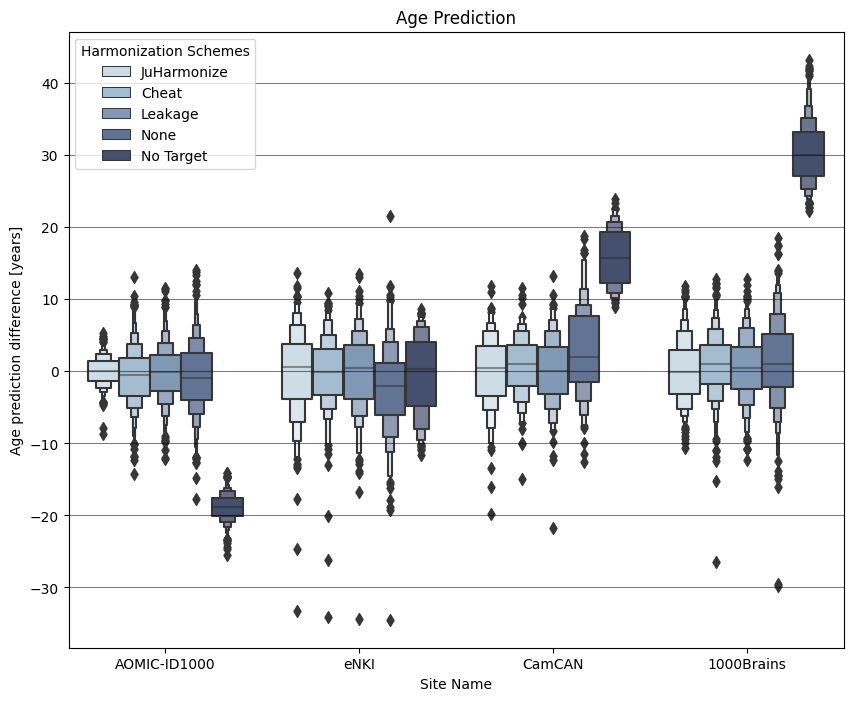

              Age_bias        R2        MAE
Cheat        -0.163459  0.960024   3.358533
JuHarmonize  -0.122256  0.969992   2.702613
Leakage      -0.133907  0.959552   3.424680
NeuroHarmony -0.897801  0.742593   9.539188
No Target    -0.998806  0.003109  20.081712
None         -0.213803  0.933309   4.331851


In [17]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_separated_ages__rf_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = (data["y_true"]-data["y_pred"])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

fig = plt.figure(figsize=[10, 8])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.boxenplot(
    data=data,
    x="site", y="y_diff", hue="Harmonization Schemes", hue_order=harm_modes,
    order=["AOMIC-ID1000", "eNKI",  "CamCAN", "1000Brains"],
    palette=pal
)
plt.ylabel("Age prediction difference [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

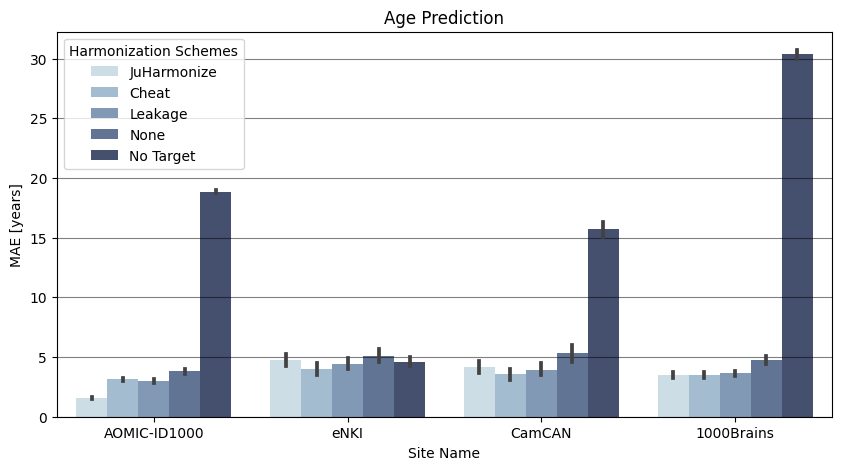

              Age_bias        R2        MAE
Cheat        -0.163459  0.960024   3.358533
JuHarmonize  -0.122256  0.969992   2.702613
Leakage      -0.133907  0.959552   3.424680
NeuroHarmony -0.897801  0.742593   9.539188
No Target    -0.998806  0.003109  20.081712
None         -0.213803  0.933309   4.331851


In [9]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_separated_ages__rf_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)


fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data, 
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes, 
    order=["AOMIC-ID1000", "eNKI",  "CamCAN", "1000Brains"],
    palette=pal
)
plt.ylabel("MAE [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

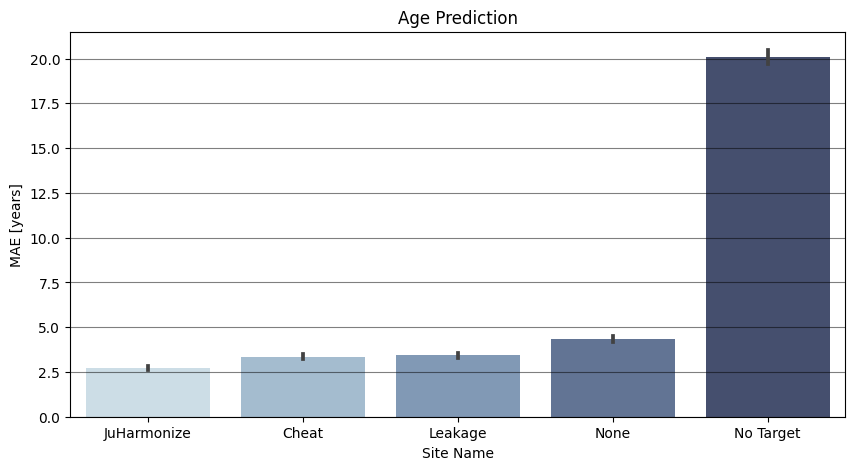

              Age_bias        R2        MAE
Cheat        -0.163459  0.960024   3.358533
JuHarmonize  -0.122256  0.969992   2.702613
Leakage      -0.133907  0.959552   3.424680
NeuroHarmony -0.897801  0.742593   9.539188
No Target    -0.998806  0.003109  20.081712
None         -0.213803  0.933309   4.331851


In [23]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_separated_ages__rf_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)


fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data, 
    x="Harmonization Schemes", y="y_diff",
    hue_order=harm_modes, 
    order=harm_modes,
    palette=pal
)
plt.ylabel("MAE [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

# BALANCED DATA

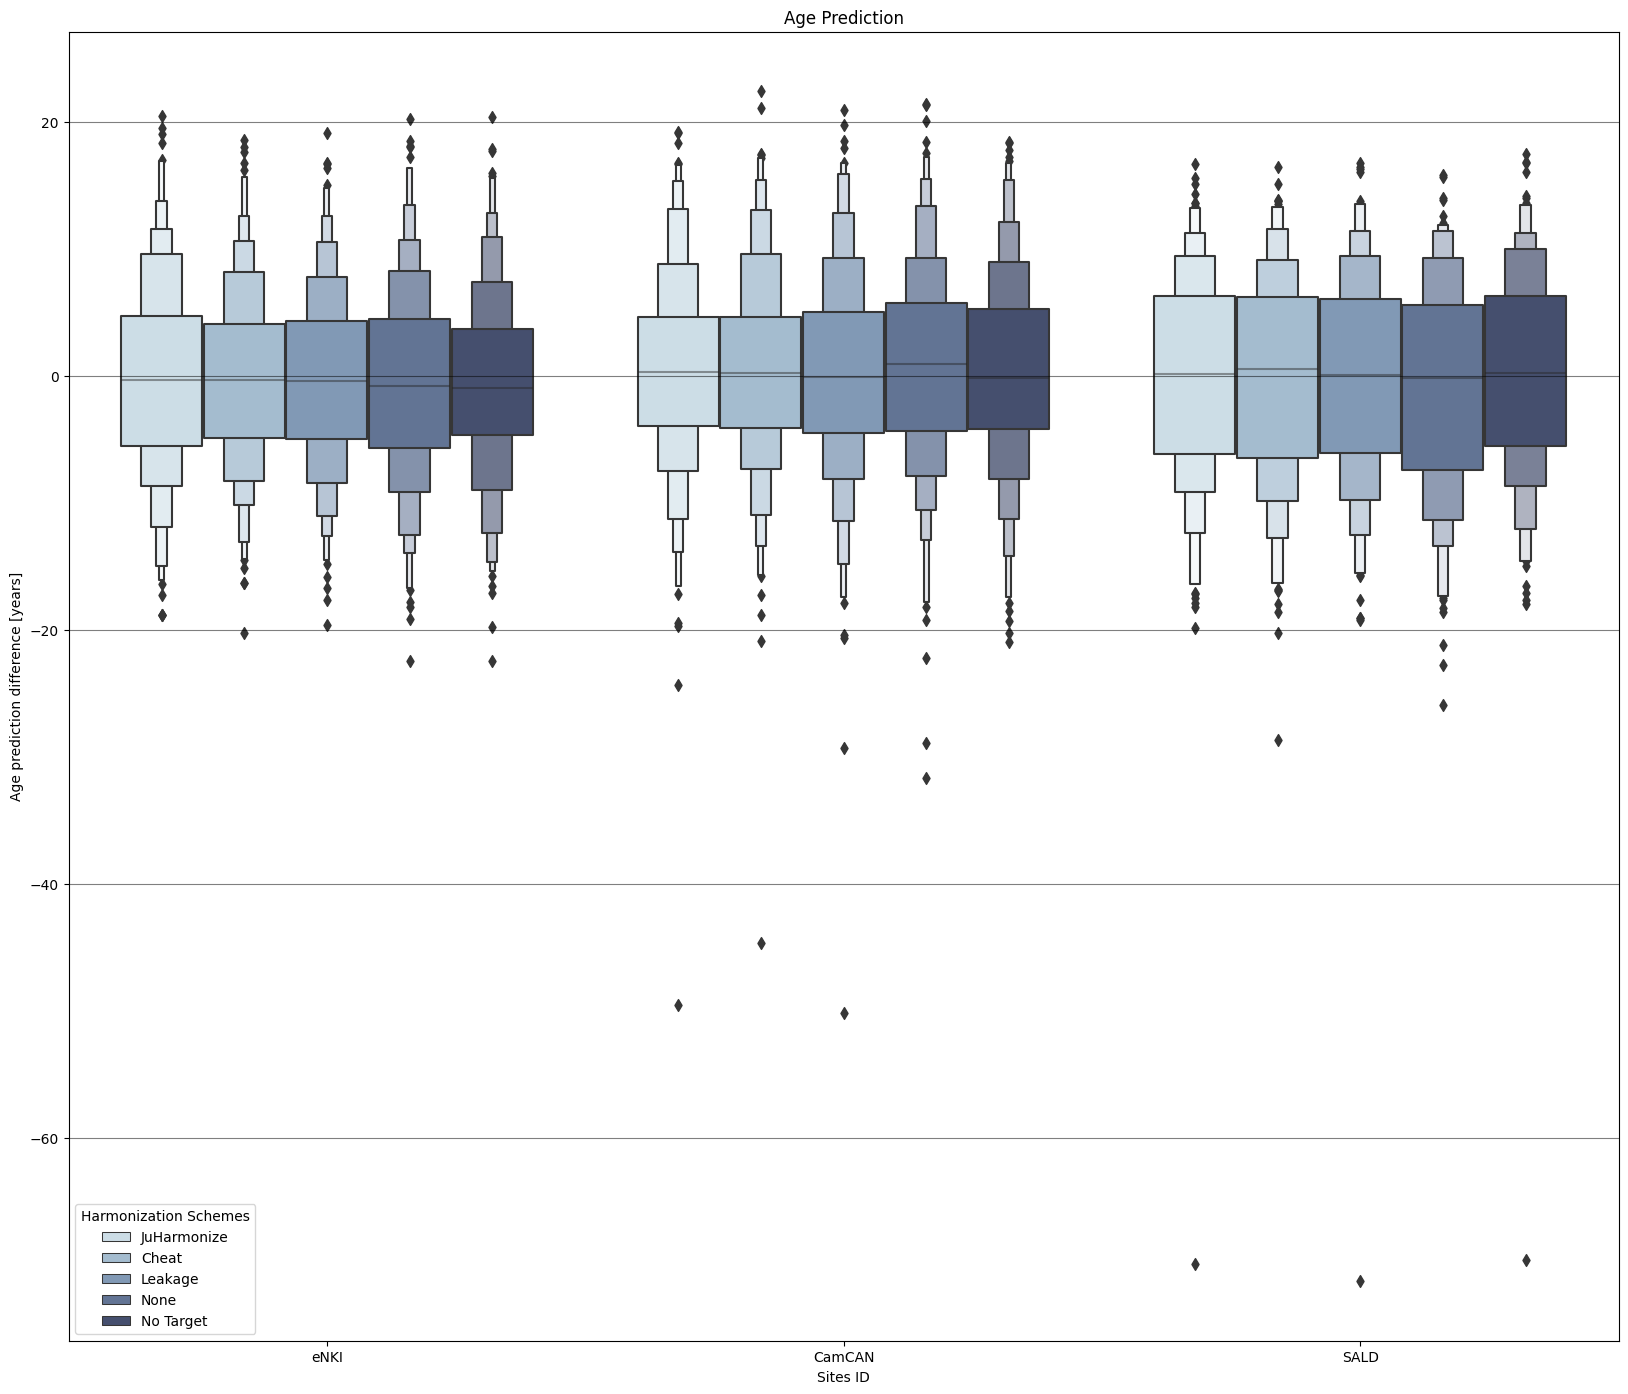

             Age_bias        R2       MAE
Cheat       -0.366155  0.803460  6.034794
JuHarmonize -0.423953  0.769231  6.306701
Leakage     -0.319046  0.775501  6.153351
No Target   -0.341006  0.790369  6.036082
None        -0.361386  0.785301  6.314433


In [41]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_balanced_data_rvr_stack_rvr_pred'}
data = extract_experiment_data(exp_dir, experiments_to_check, train=False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False
harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 17])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    hue_order=harm_modes,
    x="site", y="y_diff", hue="Harmonization Schemes"

)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

             Age_bias        R2       MAE
Cheat       -0.366155  0.803460  6.034794
JuHarmonize -0.423953  0.769231  6.306701
Leakage     -0.319046  0.775501  6.153351
No Target   -0.341006  0.790369  6.036082
None        -0.361386  0.785301  6.314433


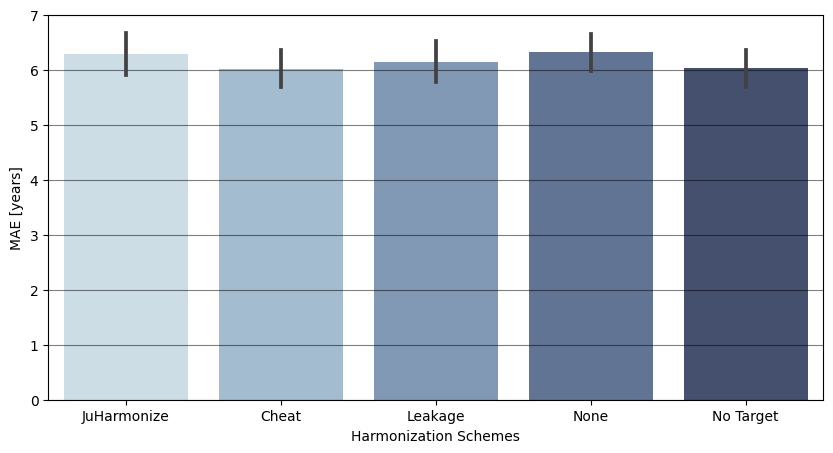

In [44]:
data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
data = data[data["Harmonization Schemes"].isin(harm_modes)]

fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data,
    x="Harmonization Schemes", y="y_diff",
    order=harm_modes, ax=ax,
    palette=pal, seed=23, n_boot=1000
)
plt.ylabel("MAE [years]")
plt.xlabel("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
table = table_generation(data)
print(table)
plt.grid(alpha=0.5, axis="y", c="black")
# plt.ylim([0, 5])

# # Comparisons for statistical test
# box_list = [("JuHarmonize", "Cheat"),
#             ("JuHarmonize", "Leakage"),
#             ("JuHarmonize", "None")]


# add_stat_annotation(ax, data=data, x="Harmonization Schemes", y="y_diff",
#                     box_pairs=box_list, test='Wilcoxon',
#                     text_format='star', loc='outside', order=harm_modes,
#                     verbose=1,
#                     pvalue_thresholds=[[1, "ns"], [0.01, "* p<0.01"]])
plt.show()

# Multiples pipelines

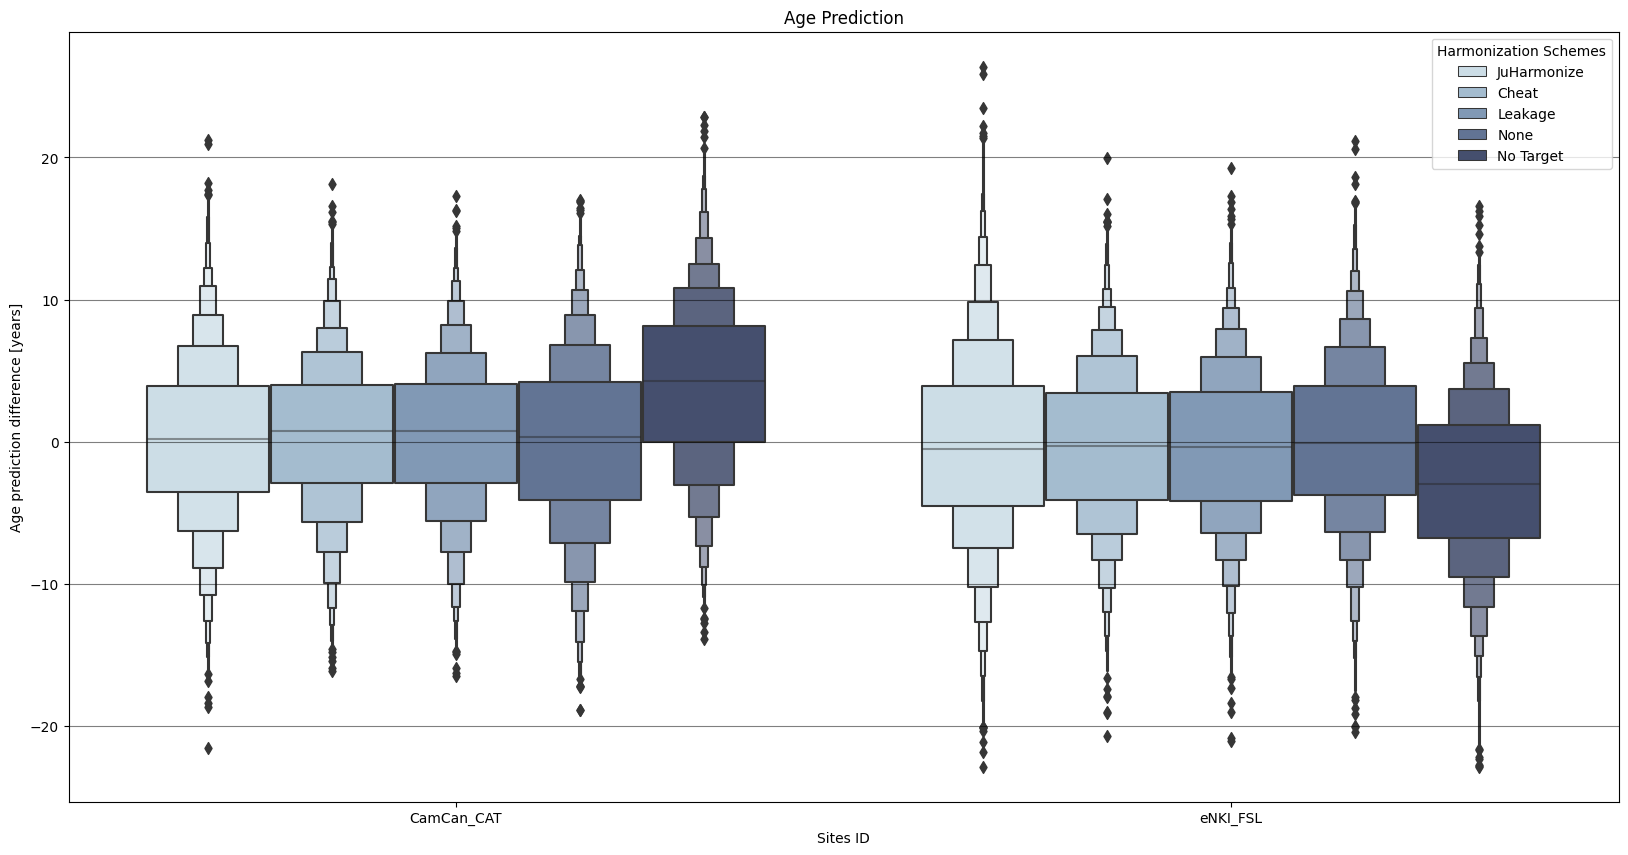

             Age_bias        R2       MAE
Cheat       -0.328370  0.913924  4.265881
JuHarmonize -0.304208  0.881896  4.904715
Leakage     -0.328531  0.913848  4.281762
No Target   -0.403041  0.862038  5.470694
None        -0.354973  0.896560  4.676817


In [2]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

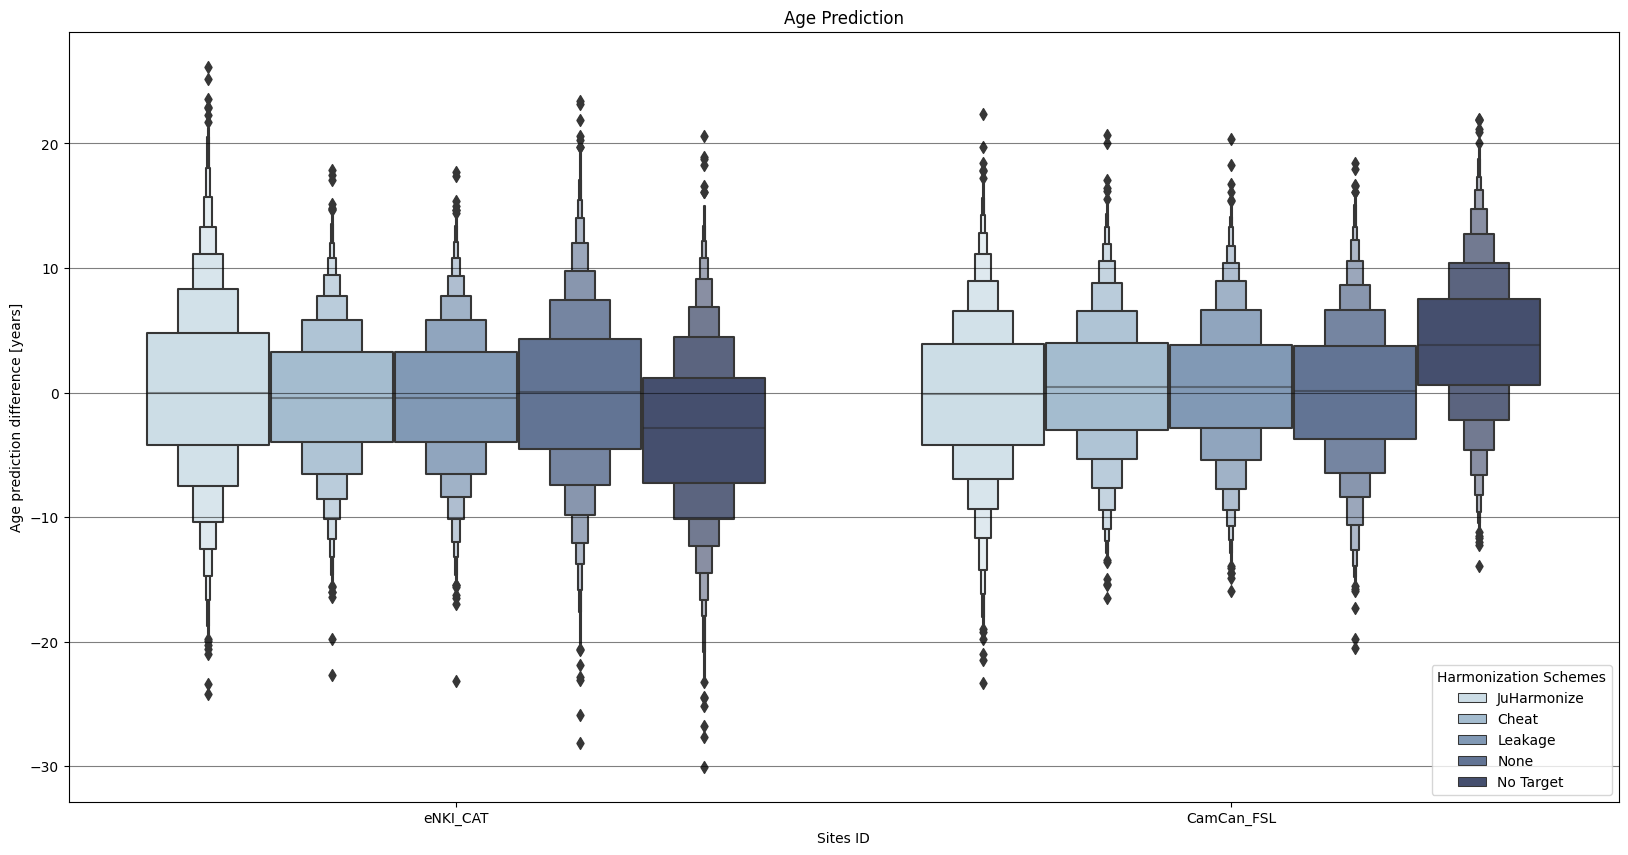

             Age_bias        R2       MAE
Cheat       -0.327047  0.914613  4.208306
JuHarmonize -0.317348  0.868596  5.173316
Leakage     -0.327304  0.915025  4.213048
No Target   -0.411813  0.854869  5.537770
None        -0.371929  0.885749  4.866089


In [3]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_eNKI_CAT_CamCAN_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

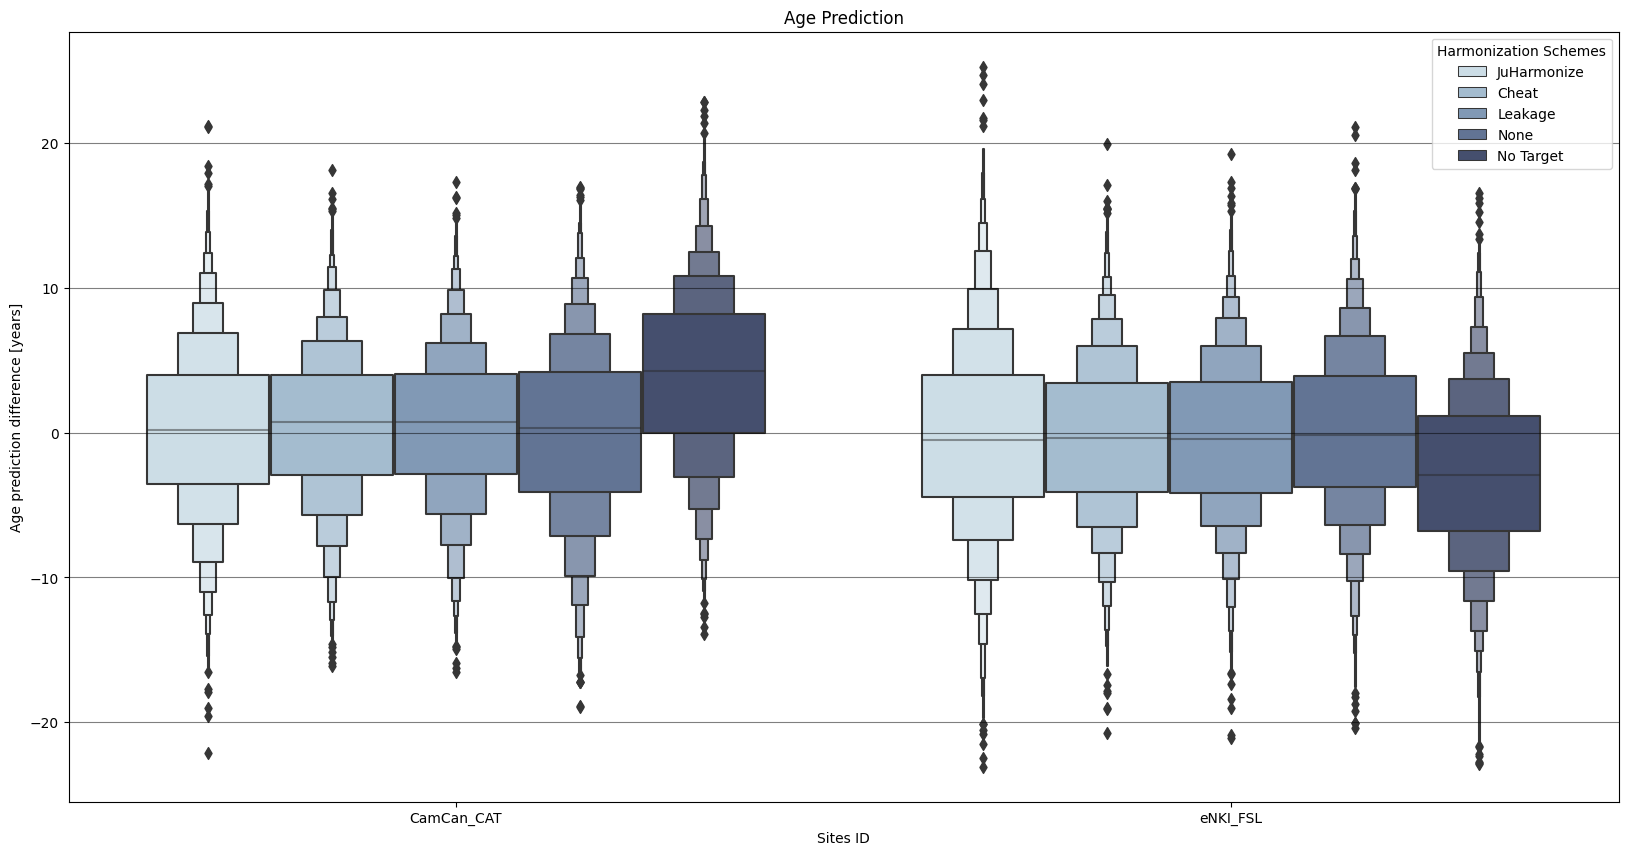

             Age_bias        R2       MAE
Cheat       -0.328370  0.913924  4.265881
JuHarmonize -0.304651  0.882024  4.904388
Leakage     -0.328531  0.913848  4.281762
No Target   -0.403041  0.862038  5.470694
None        -0.354973  0.896560  4.676817


In [4]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL_20points'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

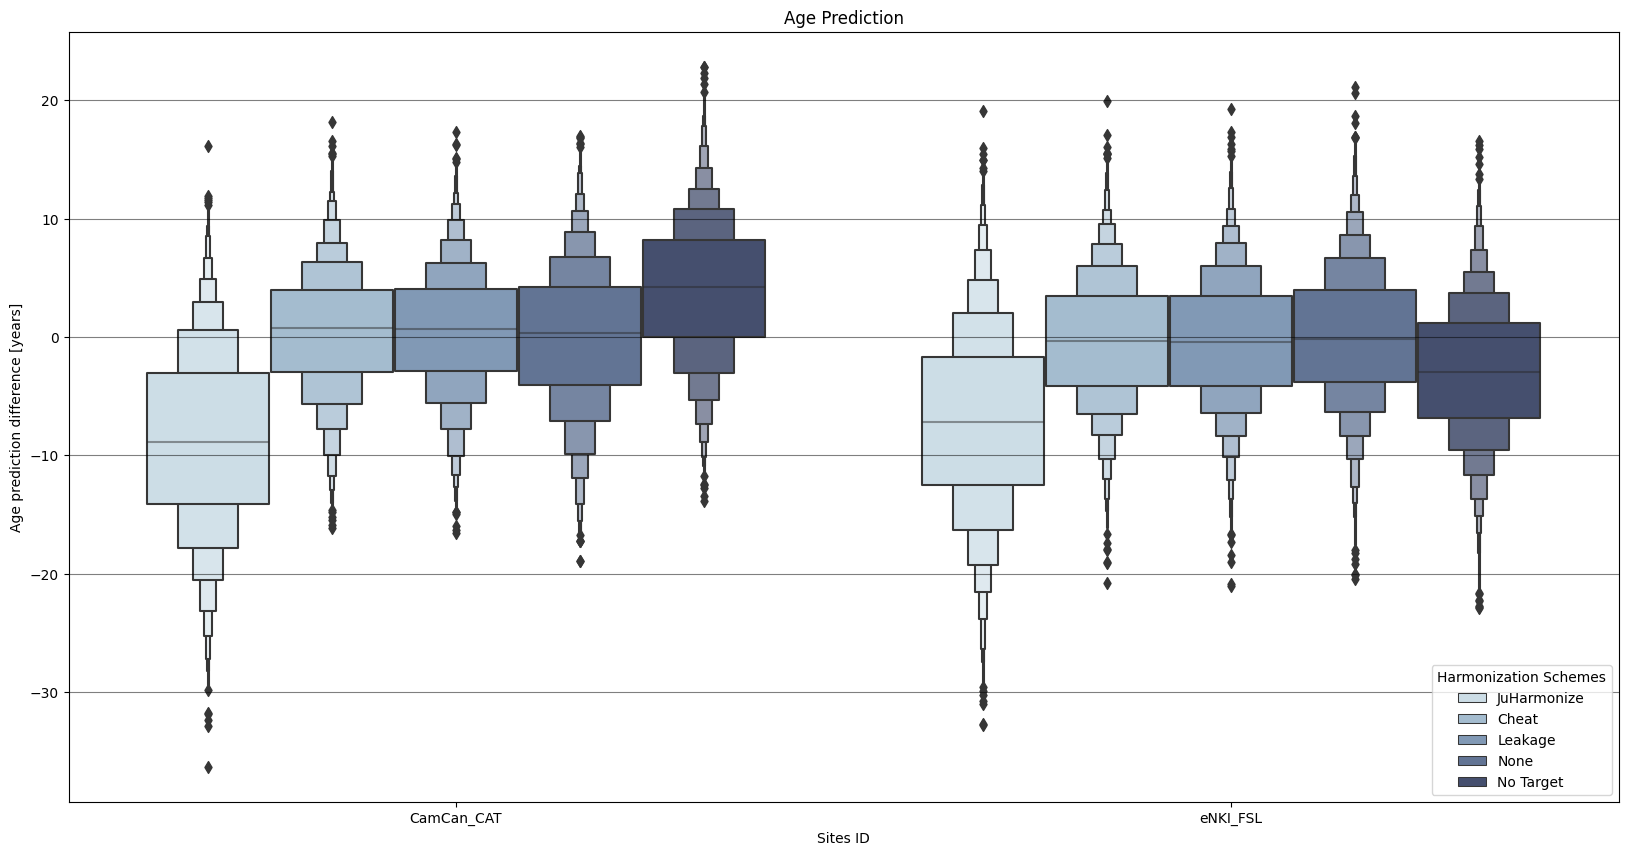

             Age_bias        R2       MAE
Cheat       -0.328370  0.913924  4.265881
JuHarmonize -0.157768  0.627919  9.108382
Leakage     -0.328531  0.913848  4.281762
No Target   -0.403041  0.862038  5.470694
None        -0.354973  0.896560  4.676817


In [5]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_LinearSVR_stack_rvr_pred_CamCAN_CAT_eNKI_FSL_20points'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

<AxesSubplot: xlabel='y_true', ylabel='y_pred'>

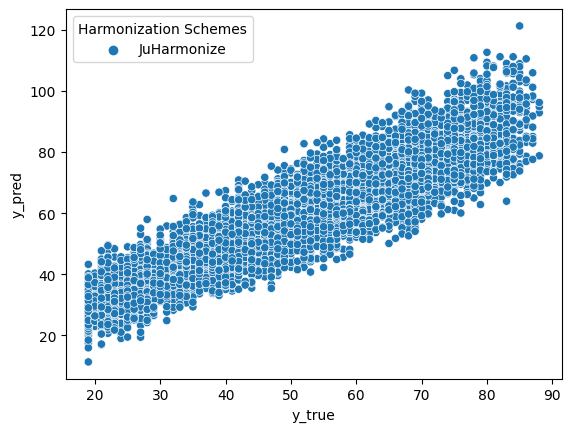

In [10]:
harm_modes = 'JuHarmonize'

data_to_plot = data[data["Harmonization Schemes"] == harm_modes]

sbn.scatterplot(
    data=data_to_plot,
    x="y_true", y="y_pred", hue="Harmonization Schemes",
)

# Noisy data

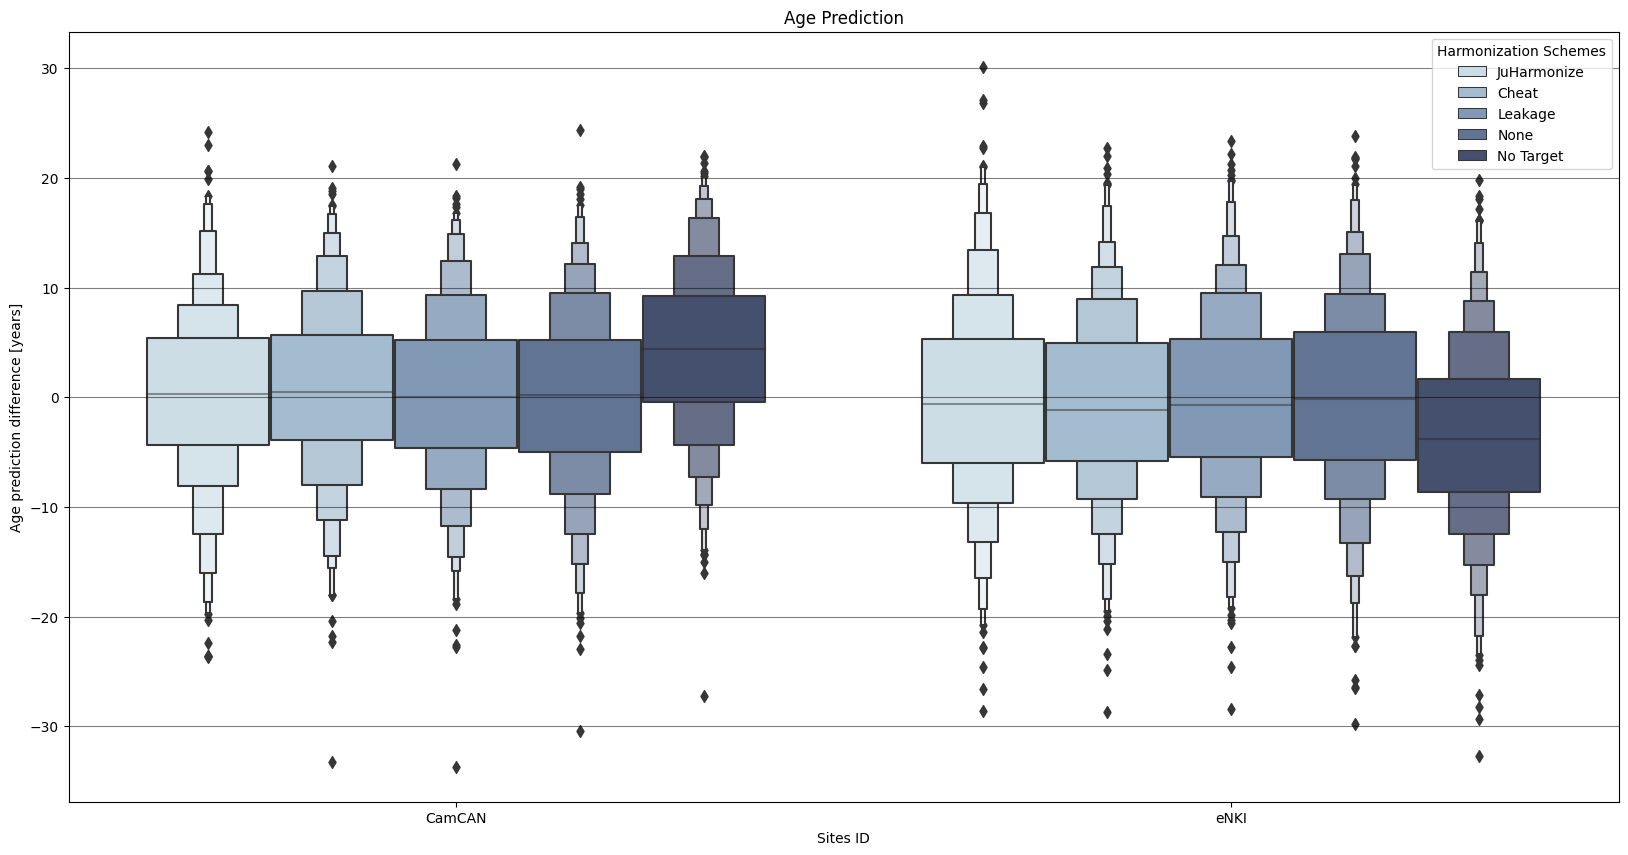

             Age_bias        R2       MAE
Cheat       -0.397762  0.817176  6.168148
JuHarmonize -0.335858  0.795028  6.503076
Leakage     -0.397405  0.817000  6.168831
No Target   -0.470421  0.777780  6.989064
None        -0.404923  0.798481  6.599453


In [19]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_noisy_data_rf_stack_rvr_pred_CamCAN_eNKI'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

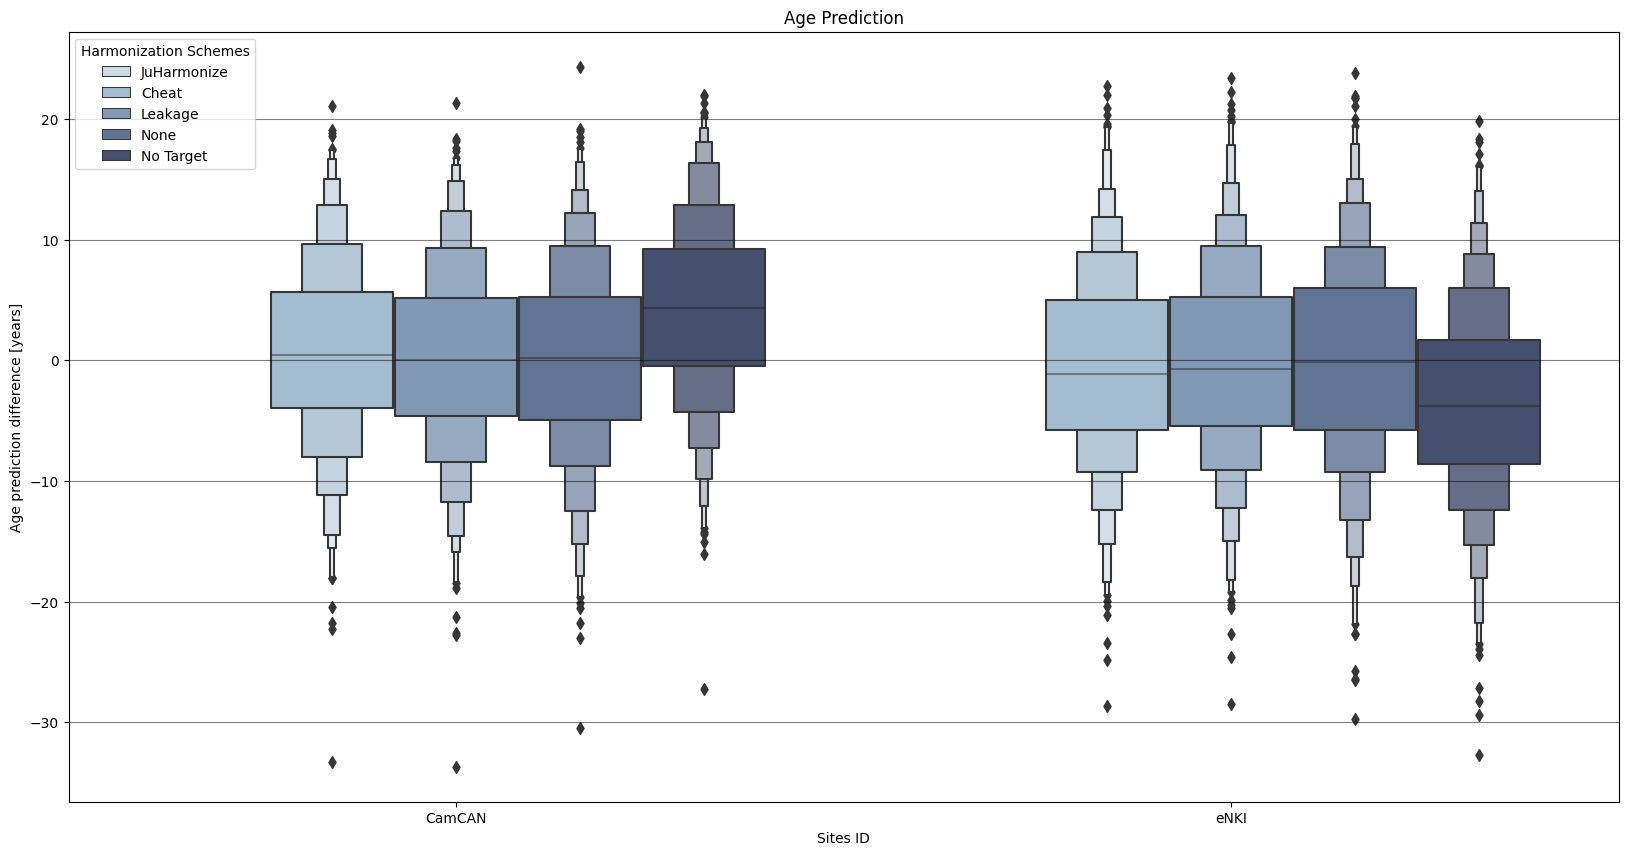

           Age_bias        R2       MAE
Cheat     -0.397762  0.817176  6.168148
Leakage   -0.397405  0.817000  6.168831
No Target -0.470421  0.777780  6.989064
None      -0.404923  0.798481  6.599453


In [20]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_noisy_data_rf_stack_rvr_pred_CamCAN_eNKI_100images'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

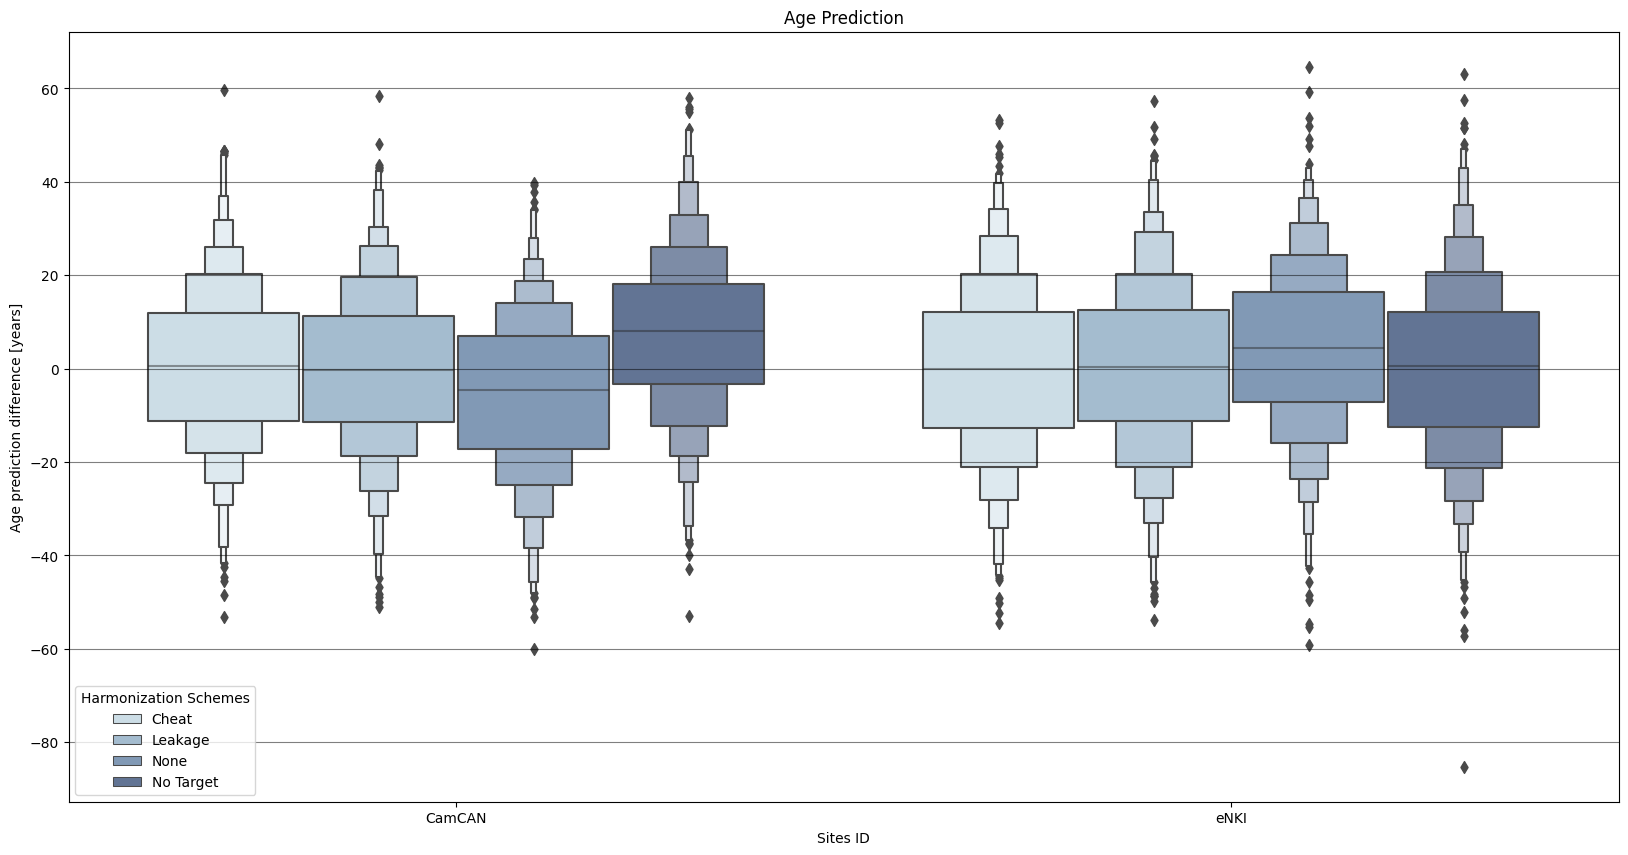

           Age_bias        R2        MAE
Cheat     -0.197430  0.072246  14.104580
Leakage   -0.200779  0.068141  14.079289
No Target -0.250183 -0.027794  14.742994
None      -0.143635  0.032564  14.352016


In [24]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_noisy_data_logit_stack_LinearSVR_pred_CamCAN_eNKI'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

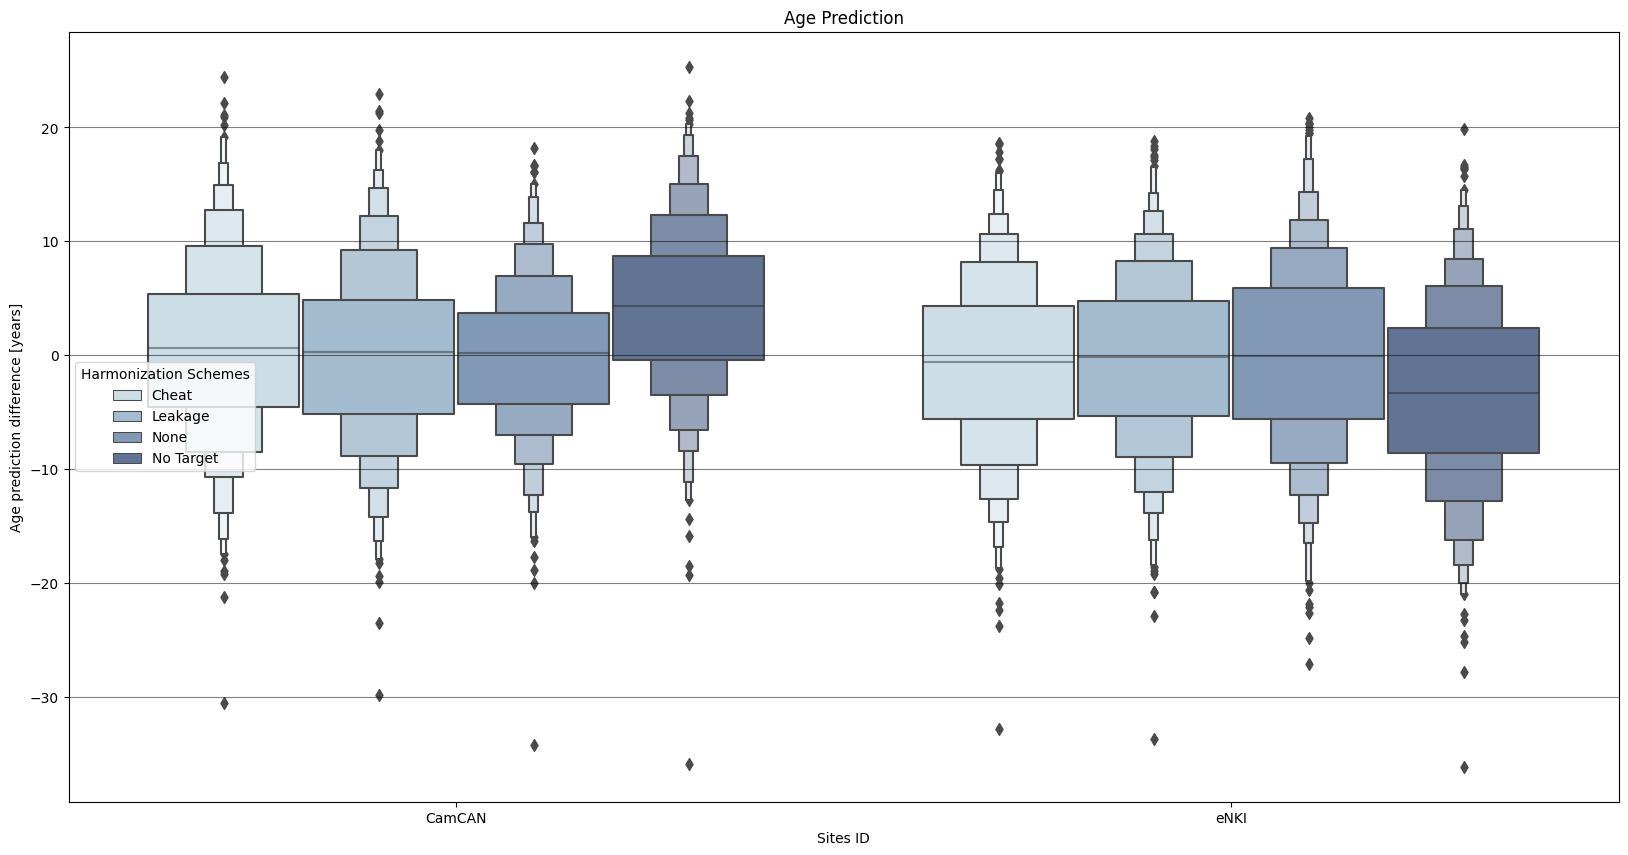

           Age_bias        R2       MAE
Cheat     -0.383137  0.828822  6.023240
Leakage   -0.356644  0.832194  5.958305
No Target -0.466122  0.785864  6.798360
None      -0.393321  0.841559  5.775120


In [25]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_noisy_data_rf_stack_rvr_pred_CamCAN_no_noise_eNKI_positive_noisy_mean2'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=False)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

sbn.boxenplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.title("Age Prediction")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)

# Simple multiplicative noise progression

In [17]:
import pandas as pd

d1 = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/results_noisydaya.csv")  # noqa
d2 = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/results_noisydaya_last.csv")  # noqa
d3 = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/results_noisydaya_last2.csv")  # noqa
d4 = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/results_noisydaya_notarget.csv")  # noqa
df = pd.concat([d1, d2, d3, d4])



In [3]:
d4 = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/results_noisydaya.csv", index_col=0)  # noqa


<AxesSubplot: xlabel='noise_level', ylabel='MAE'>

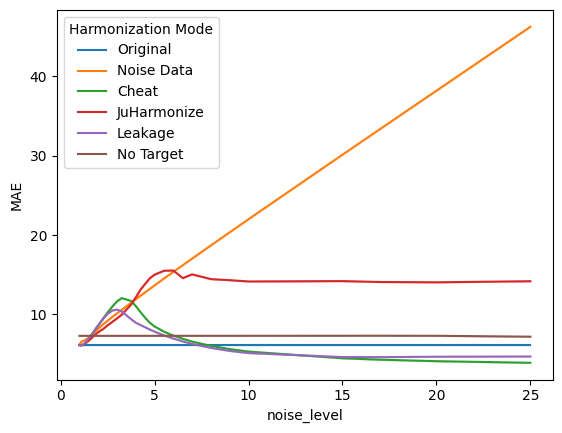

In [18]:
sbn.lineplot(data=df, x="noise_level",
             y="MAE", hue="Harmonization Mode")

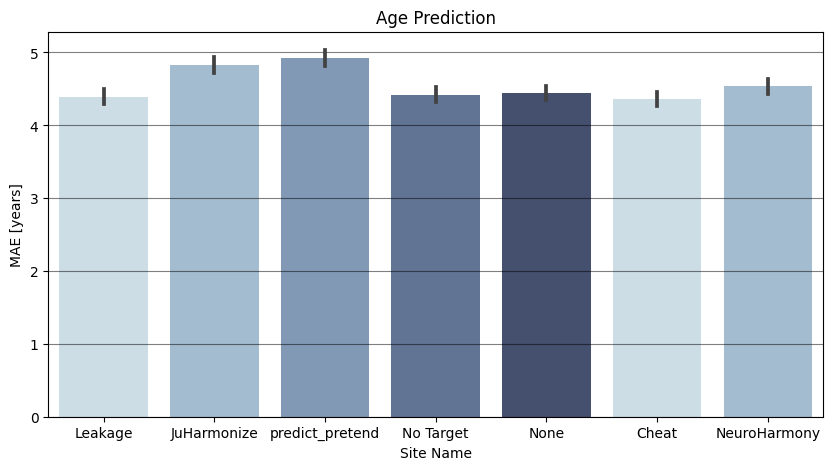

                 Age_bias        R2       MAE
Cheat           -0.765748  0.341313  4.350115
JuHarmonize     -0.753852  0.196896  4.827586
Leakage         -0.756047  0.328098  4.392414
NeuroHarmony    -0.792053  0.286861  4.537241
No Target       -0.762725  0.322036  4.416092
None            -0.768891  0.324354  4.428046
predict_pretend -0.770878  0.158486  4.916552


In [38]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_Kersten_data_min30_rf_stack_rvr_pred_5repetitions'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)


fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=data, 
    x="Harmonization Schemes", y="y_diff",
    # hue_order=harm_modes, 
    # order=harm_modes,
    palette=pal
)
plt.ylabel("MAE [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

In [ ]:
data

data

In [31]:
from pathlib import Path
import pandas as pd
exp_dir = "/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/"


methods = ["cheat", "none", "juharmonize","leak","notarget"]
results_method = pd.DataFrame()
results = pd.DataFrame()
for method in methods:
    results_method = pd.DataFrame()

    print(method)

    results_method["y_pred"] = pd.read_csv(exp_dir+ "y_pred_"+method+".csv", index_col=0).dropna(axis=1).to_numpy().ravel()

    
    results_method["y_true"] = pd.read_csv(exp_dir+ "y_true.csv", index_col=0).dropna(axis=1).to_numpy().ravel()
    results_method["site"] = pd.read_csv(exp_dir+ "sites.csv", index_col=0).dropna(axis=1).to_numpy().ravel()

    results_method["y_diff"] = (results_method["y_true"]-results_method["y_pred"])
    results_method["Harmonization Scheme"] = method
    results = pd.concat([results,results_method])




cheat
none
juharmonize
leak
notarget


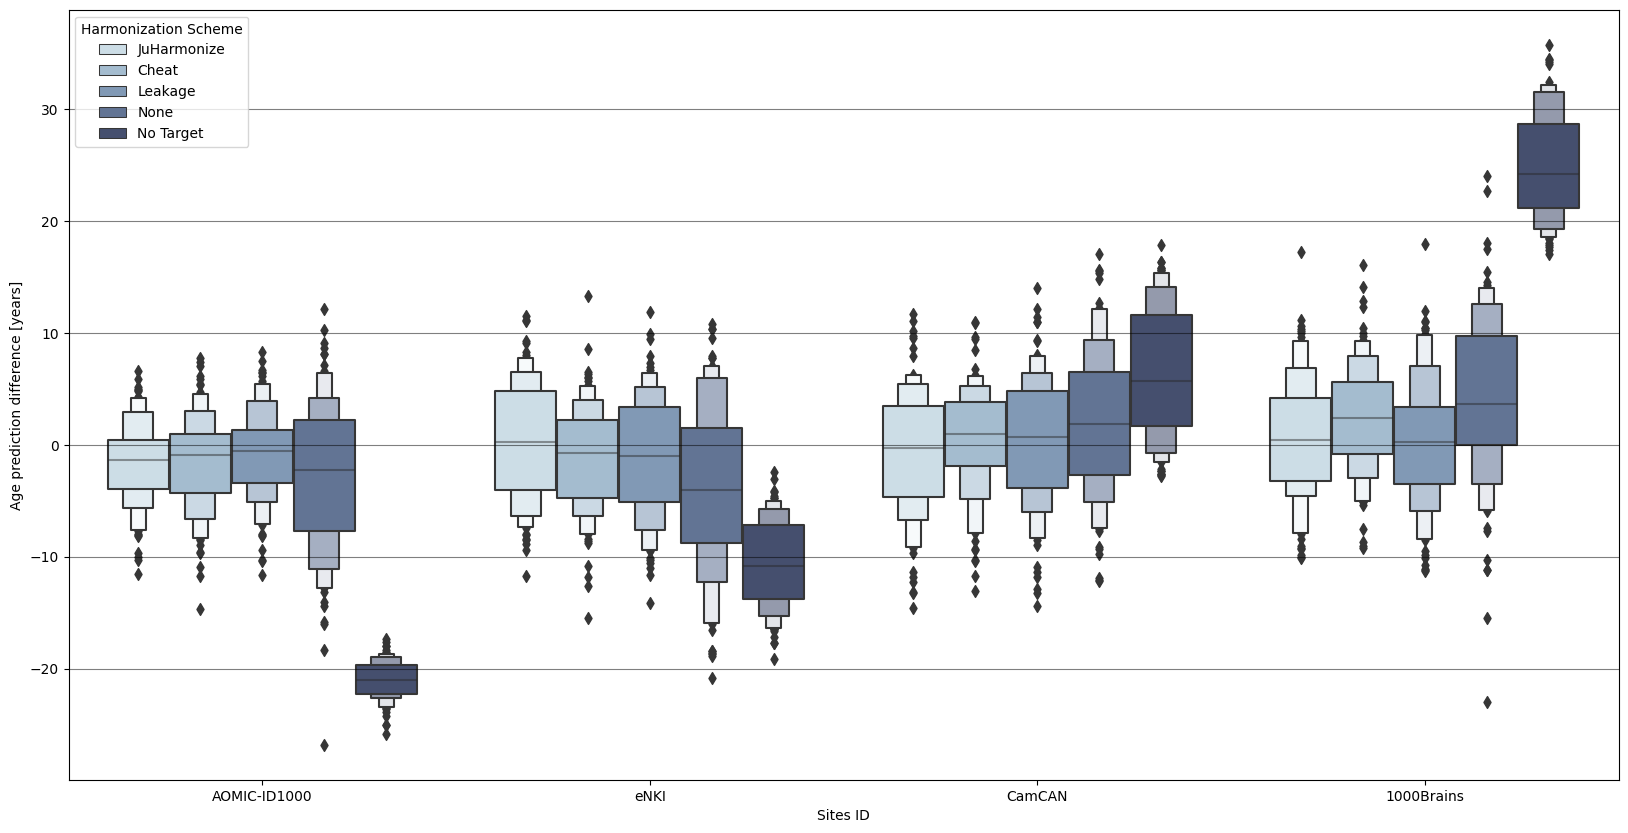

In [33]:
fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

results["Harmonization Scheme"].replace({"juharmonize": "JuHarmonize",
                                "leak": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "notarget": "No Target"}, inplace=True)

results["site"].replace({0: "AOMIC-ID1000",
                                1: "eNKI",
                                2: "CamCAN",
                                3: "1000Brains",}, inplace=True)
sbn.boxenplot(
    data=results, palette=pal,
    x="site", y="y_diff", hue="Harmonization Scheme",
    hue_order=harm_modes
)
plt.ylabel("Age prediction difference [years]")
plt.xlabel("Sites ID")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

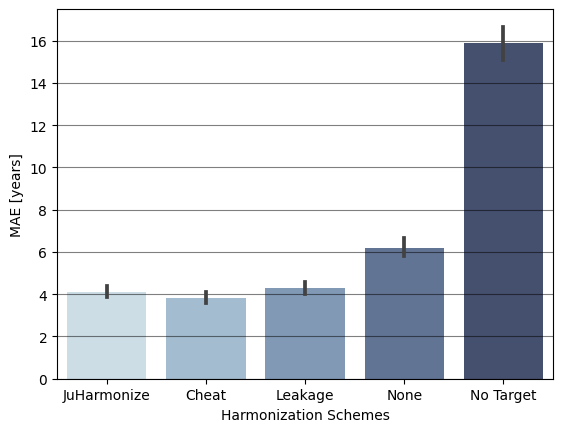

In [5]:
results["y_diff_abs"] = np.abs(results["y_diff"])
ax = sbn.barplot(
    data=results, 
    x="Harmonization Scheme", y="y_diff_abs",
    order=harm_modes,
    palette=pal
)
plt.ylabel("MAE [years]")
plt.xlabel("Harmonization Schemes")
plt.grid(alpha=0.5, axis="y", c="black")

ValueError: Could not interpret input 'Harmonization Schemes'

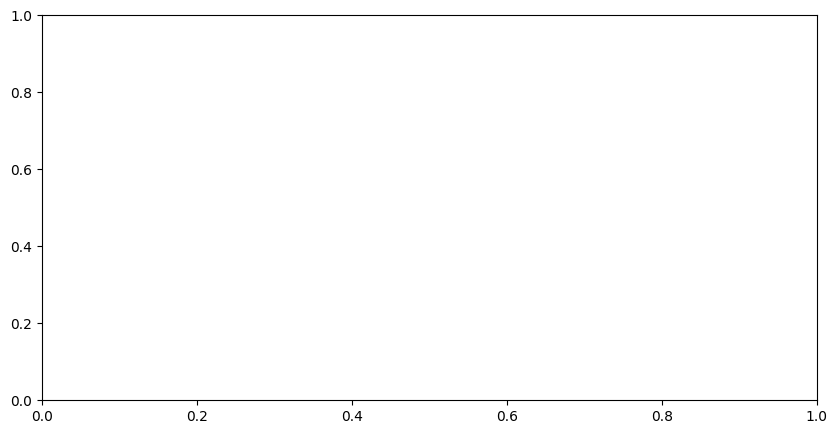

In [45]:

data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])

data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)


fig = plt.figure(figsize=[10, 5])

ax = fig.add_subplot(1, 1, 1)
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

ax = sbn.barplot(
    data=results, 
    x="Harmonization Schemes", y="y_diff",
    # hue_order=harm_modes, 
    # order=harm_modes,
    palette=pal
)
plt.ylabel("MAE [years]")
plt.xlabel("Site Name")

plt.title("Harmonization Schemes")
# sbn.move_legend(g, "upper right", bbox_to_anchor=(0.90, 0.98), frameon=False)
plt.title("Age Prediction")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()
table = table_generation(data)
print(table)

In [ ]:
results

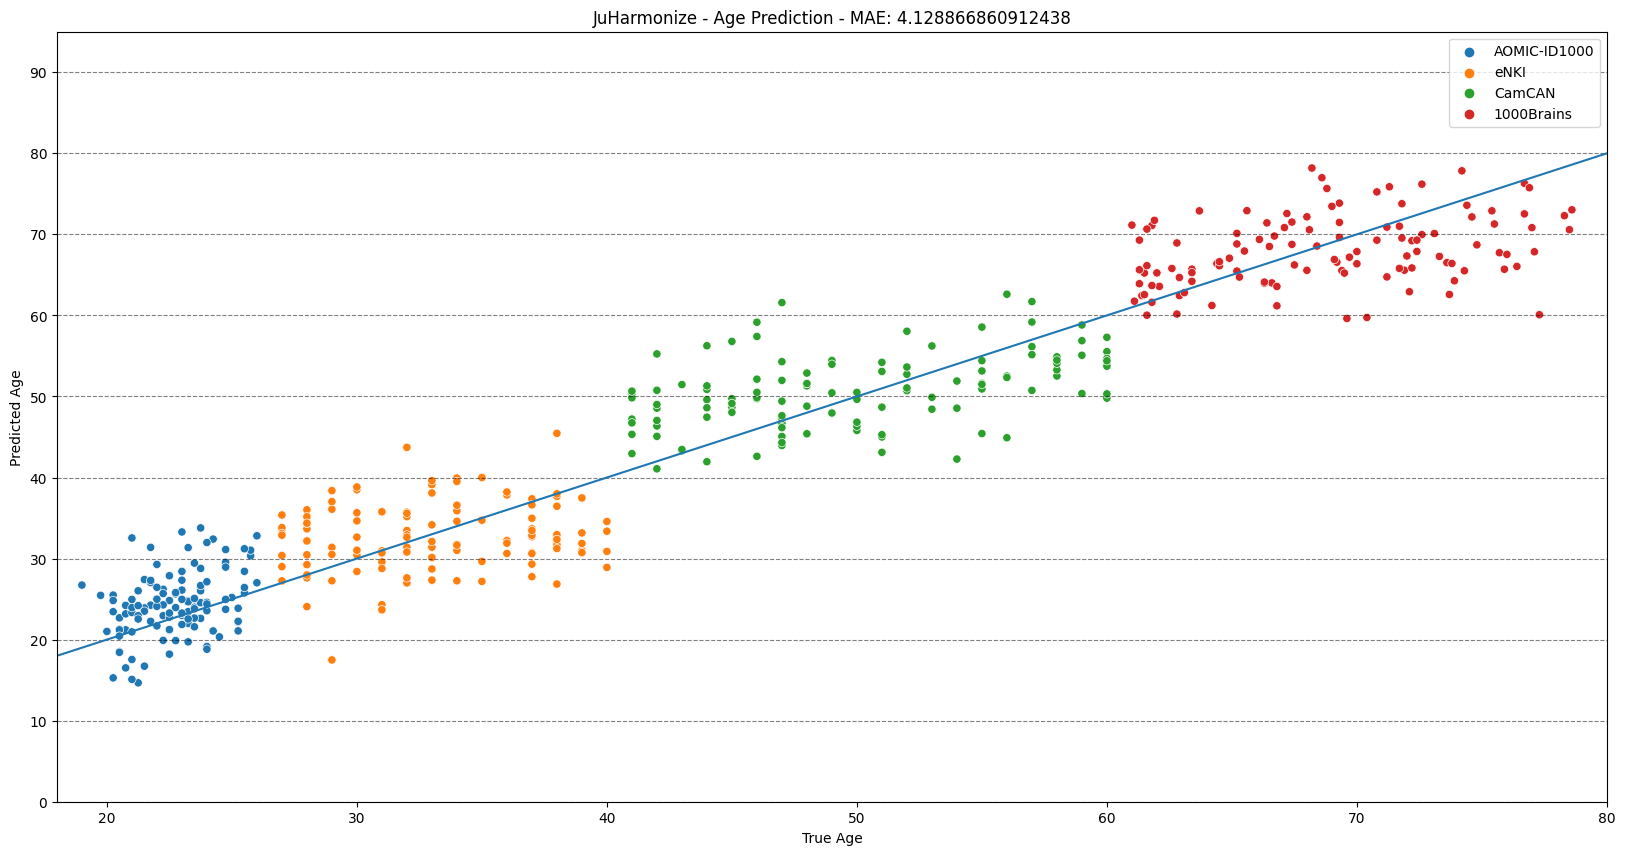

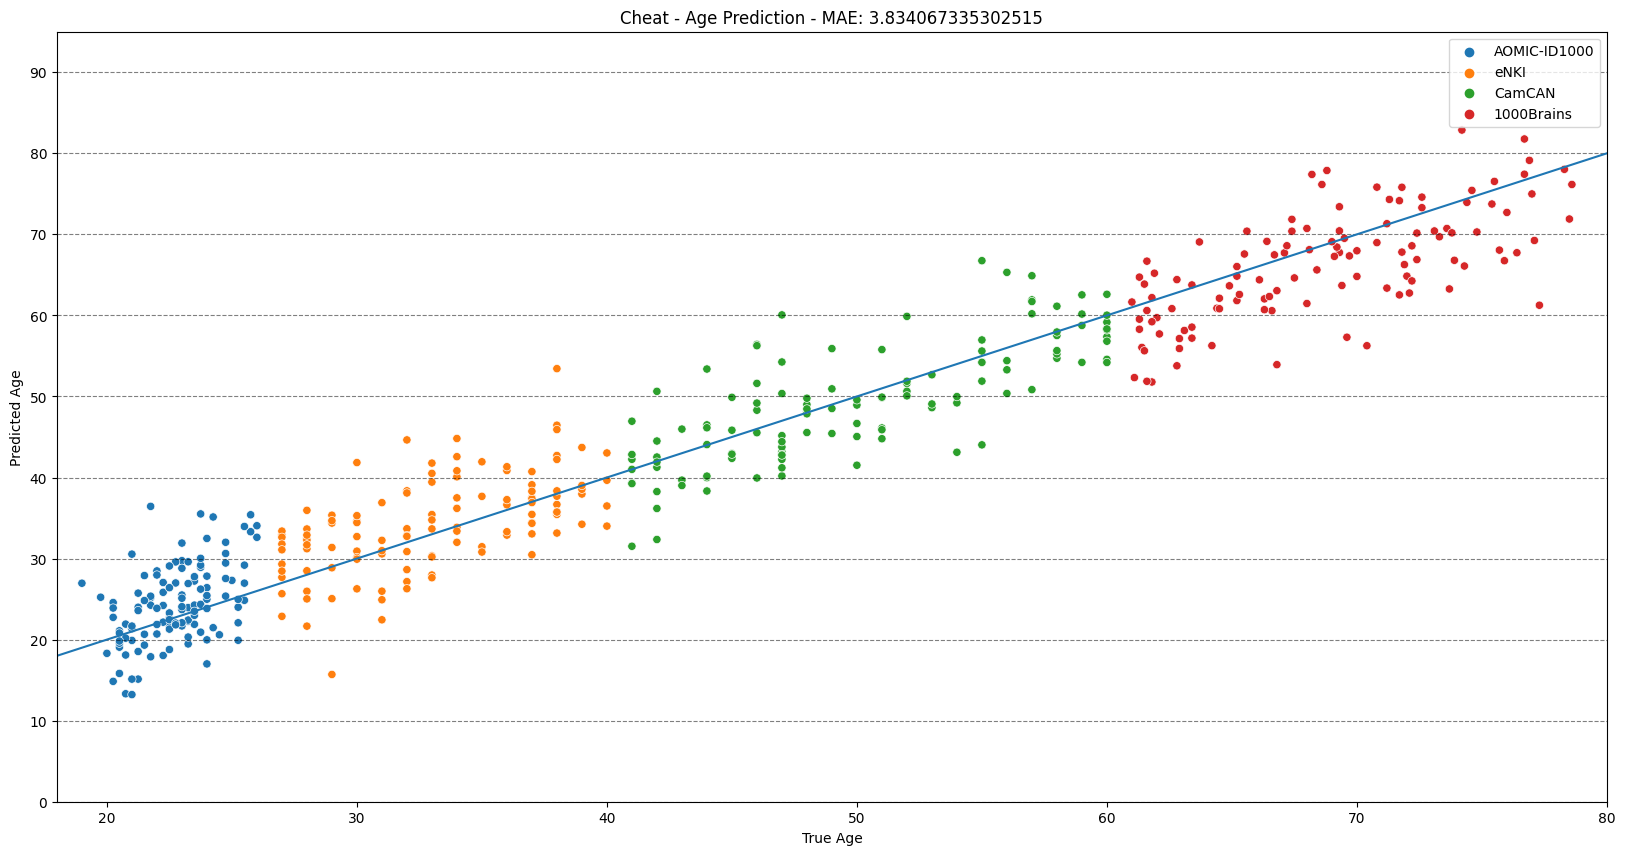

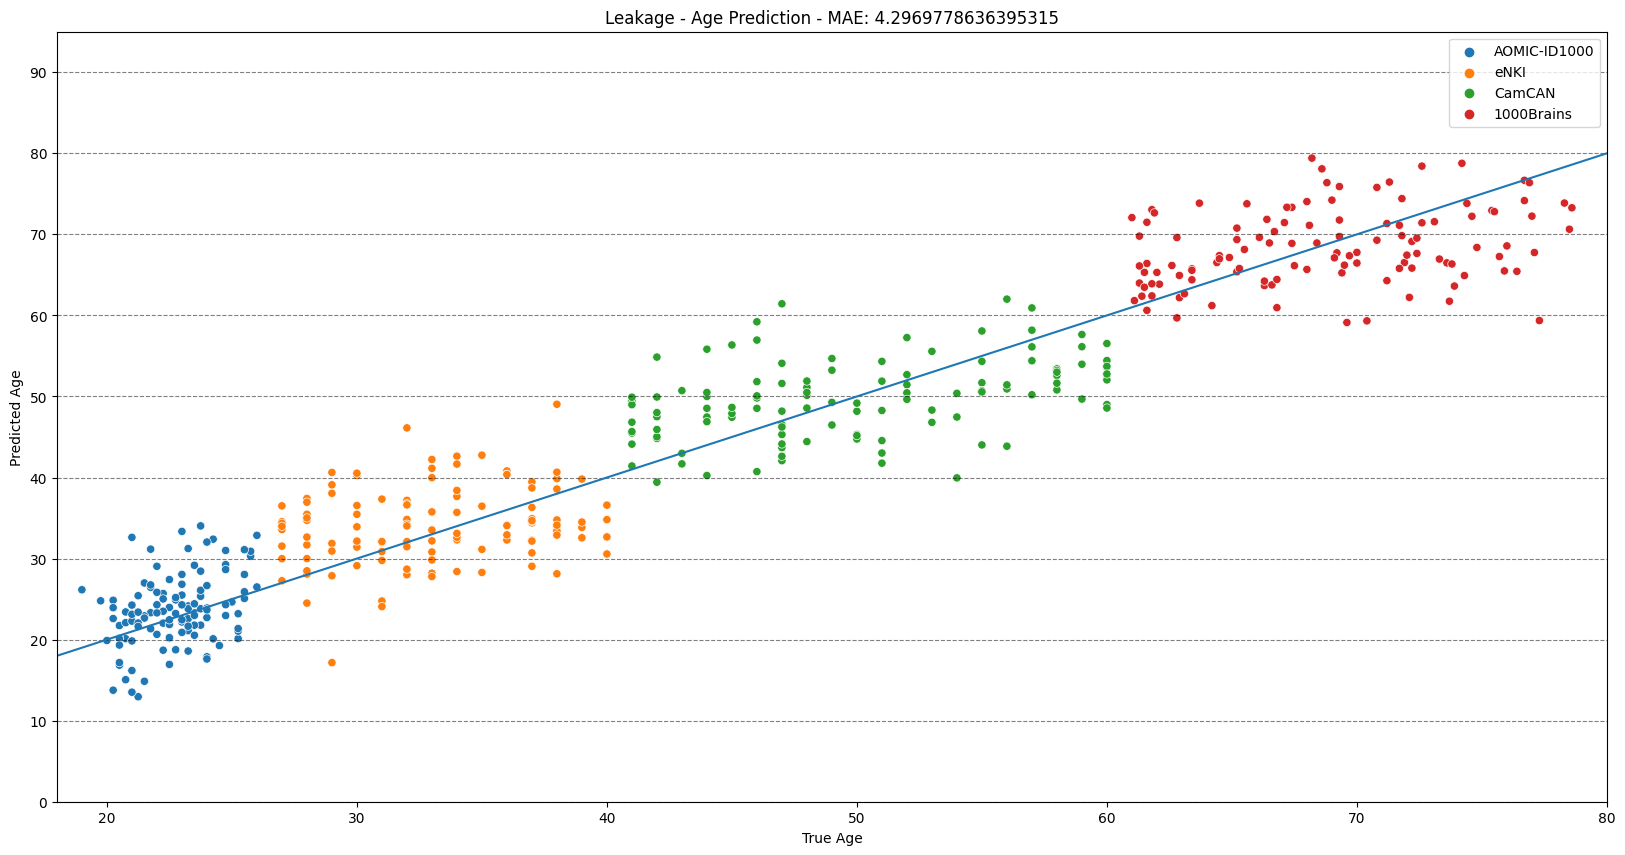

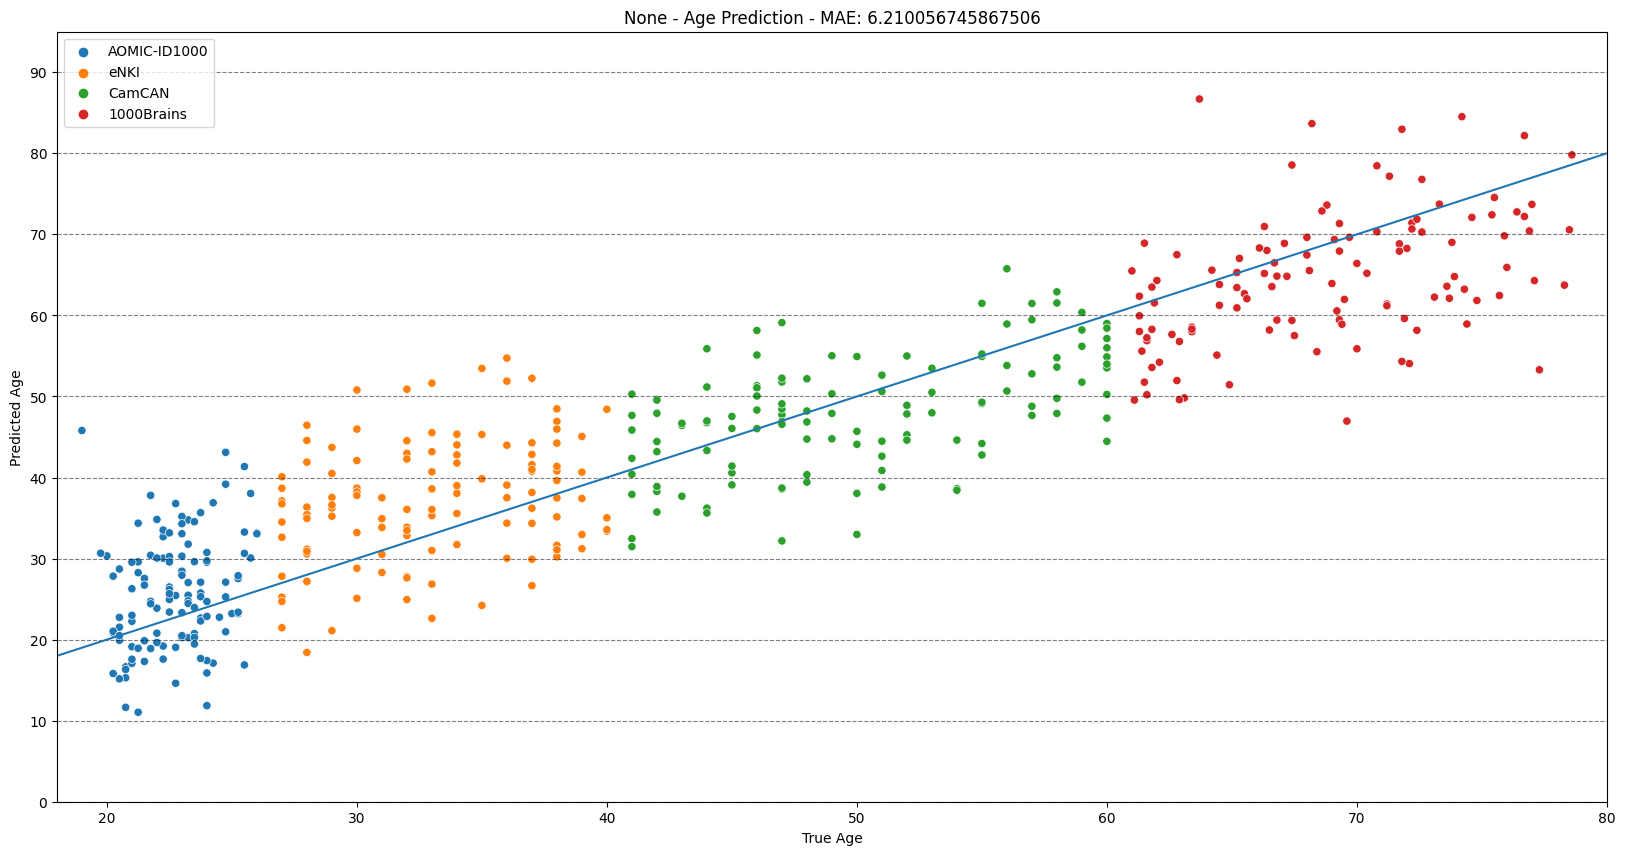

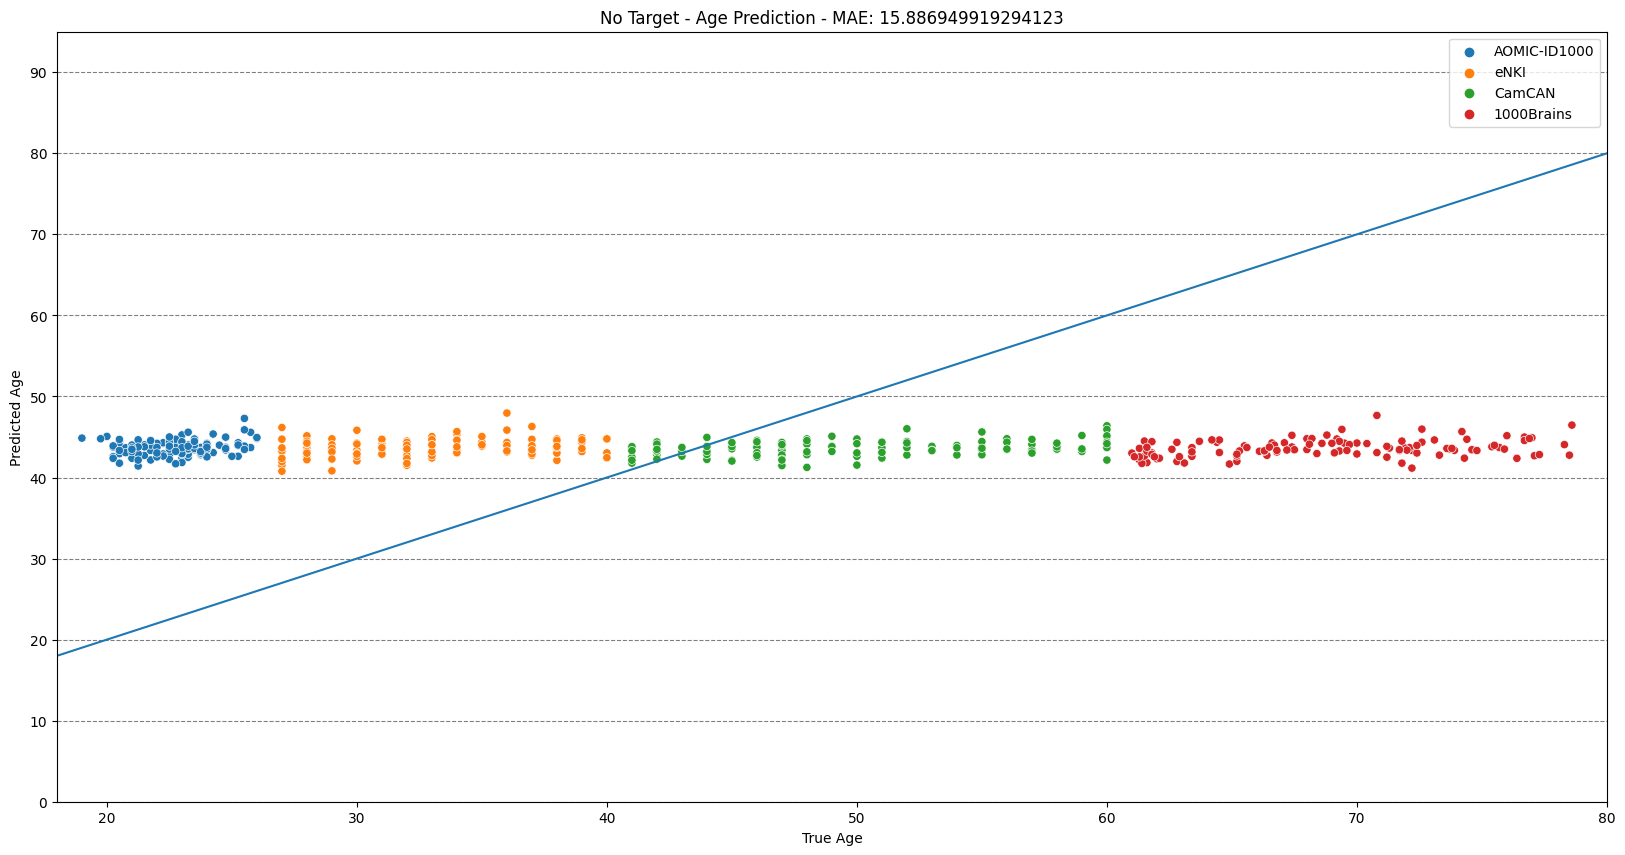

In [23]:
results = pd.read_csv("/home/nnieto/Nico/Harmonization/harmonize_project/scratch/output/results/results_age_regression_balanced_disjoint_ranges.csv")

results.rename(columns={"Harmonization Scheme":"Harmonization Schemes"}, inplace=True)

# Get Harmonizations modes
harm_modes = np.unique(results["Harmonization Schemes"])
# Initialize a table as a dataframe
table = pd.DataFrame(columns=harm_modes, index=["MAE", "R2", "Age bias"])

# Iterate over each mode
for mode in harm_modes:
    resut_mode = results[results["Harmonization Schemes"] == mode]
    final_stat = resut_mode.mean(numeric_only=True)
    table[mode] = final_stat["MAE"],final_stat["R2"],final_stat["Age bias"]

print(table)

          Cheat Test  JuHarmonize Test  Leakage Test  No Target Test  \
MAE         3.827402          4.120185      4.287193       15.938492   
R2          0.925738          0.919463      0.912036       -0.007474   
Age bias   -0.321290         -0.264923     -0.238011       -0.998774   

          None Test  
MAE        6.200548  
R2         0.813226  
Age bias  -0.433264  


In [26]:
data["site"].unique()

array(['1000Gehirne', 'CamCAN', 'eNKI', 'SALD', 'ID1000'], dtype=object)

/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(134.09722222222223, 0.5, 'Site')

/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nnieto/Nico/Harmonization/Harmonization/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(

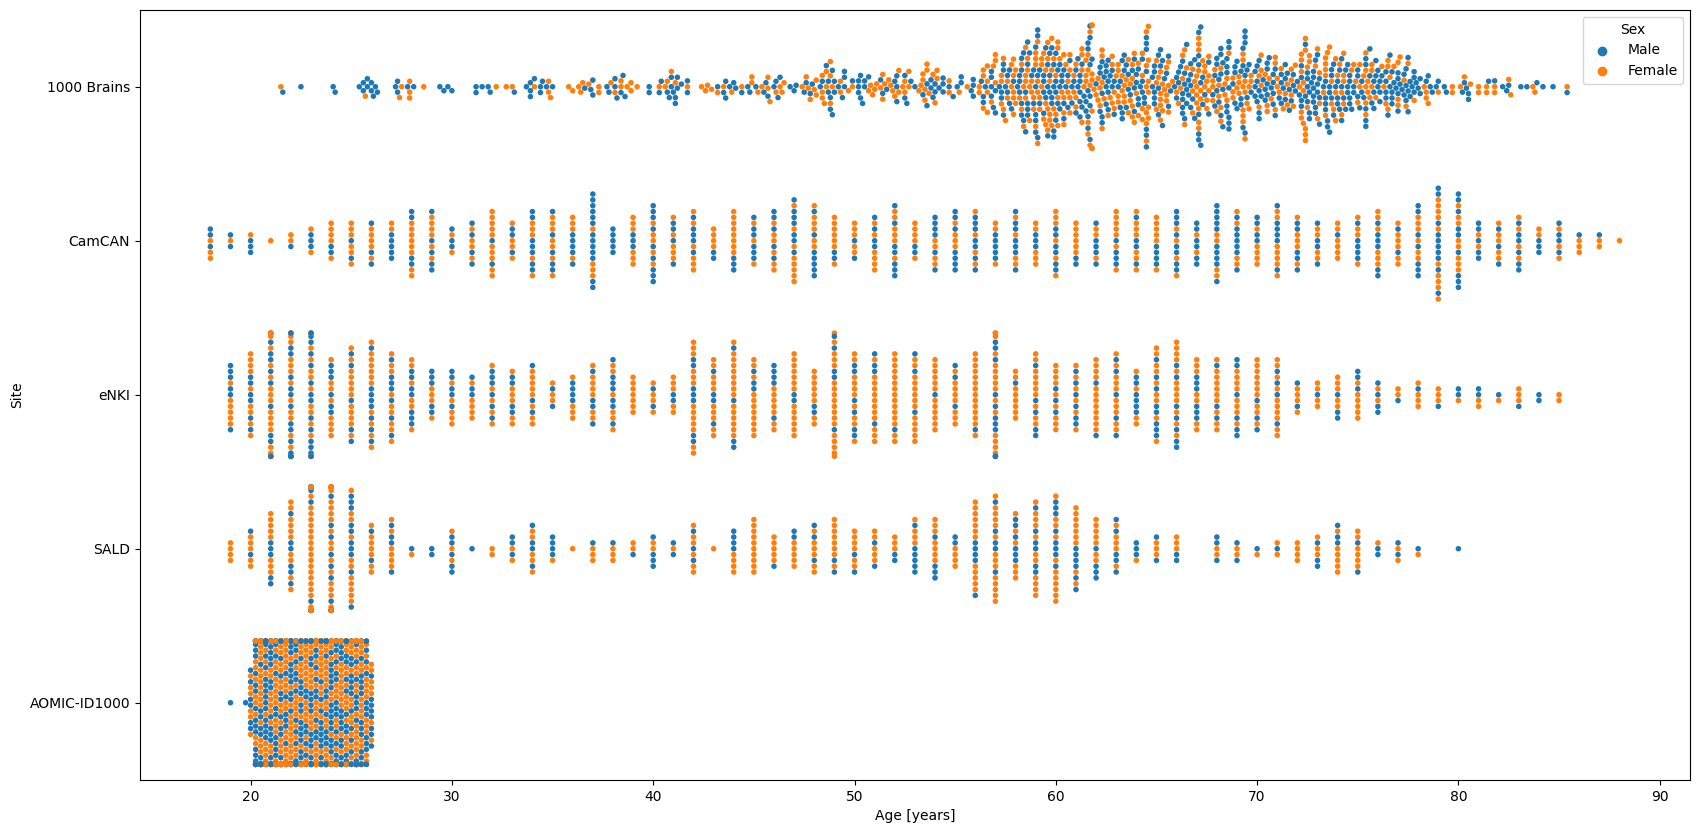

In [28]:
Y_1000brains = pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_1000Gehirne.csv")  # noqa
Y_Camcan = pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_CamCAN.csv")           # noqa
Y_ID1000 = pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_ID1000.csv")                # noqa
Y_eNKI = pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_eNKI.csv")               # noqa
Y_SALD = pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_SALD.csv")               # noqa

data = pd.concat([Y_1000brains, Y_Camcan, Y_eNKI, Y_SALD, Y_ID1000])
fig = plt.figure(figsize=[20, 10])

ax = fig.add_subplot(1, 1, 1)

data["gender"].replace({"F":"Female","M":"Male"}, inplace=True)
data["site"].replace({"ID1000":"AOMIC-ID1000","1000Gehirne":"1000 Brains"}, inplace=True)

data.rename(columns={"gender":"Sex"}, inplace=True)

sbn.swarmplot(data=data, x="age", y="site", ax=ax, hue="Sex", size=4)
plt.xlabel("Age [years]")
plt.ylabel("Site")

In [20]:
sites_print = [Y_ID1000,Y_eNKI,Y_Camcan , Y_1000brains, Y_SALD]

for site in sites_print:
    print(site.shape[0])

    print(site["age"].mean())

    print(site["age"].std())
    print(site["age"].min())
    print(site["age"].max())
    print(100*site["gender"].value_counts()[0]/site.shape[0])




928
22.849946120689655
1.7075226973386568
19.0
26.0
52.047413793103445
818
46.904645476772615
17.732424447941234
19.0
85.0
65.28117359413203
651
54.274961597542244
18.596930345294993
18.0
88.0
50.69124423963134
1144
61.84108391608391
12.389759870766024
21.5
85.4
55.15734265734266
494
45.18421052631579
17.443867485861926
19
80
62.14574898785425


55.15734265734266